In [71]:
# Importar bibliotecas (pandas e matplotlib)
import pandas as pd
import matplotlib.pyplot as plt

Os dados apresentam a quantidade de homicídios registrados em cada estado brasileiro ao longo dos anos, permitindo analisar a evolução da violência no país. Cada registro contém informações sobre a unidade federativa (UF), o ano de referência e o número total de ocorrências. Esses dados são essenciais para identificar tendências, comparar estados e subsidiar a formulação de políticas públicas de segurança. A análise pode revelar padrões sazonais, regiões com maior incidência de homicídios e a eficácia das estratégias governamentais ao longo do tempo. Além disso, o cruzamento com outras variáveis, como população, índices socioeconômicos e políticas de segurança, pode fornecer insights mais aprofundados sobre os fatores que influenciam a criminalidade.

In [72]:
# Carregar os dados do arquivo CSV
df = pd.read_csv('Dados/homicidios_estado.csv', sep=';')

In [73]:
# Garante que a coluna 'nome' seja do tipo string e remove espaços extras (considerando que 'nome' representa o estado)
df['estado'] = df['nome'].astype(str).str.strip()

In [74]:
# Filtrar os dados para os estados de SP, RJ, MG e BA
estados_selecionados = ['SP', 'RJ', 'MG', 'BA']
df_filtrado = df[df['estado'].isin(estados_selecionados)]

**Pergunta 1 -** Qual é a tendência de homicídios ao longo dos anos em SP, RJ, MG e BA?

In [75]:
# Agrupa por ano e estado e somando os homicídios
homicidios_ano_estado = df_filtrado.groupby(['período', 'estado'])['valor'].sum().unstack()

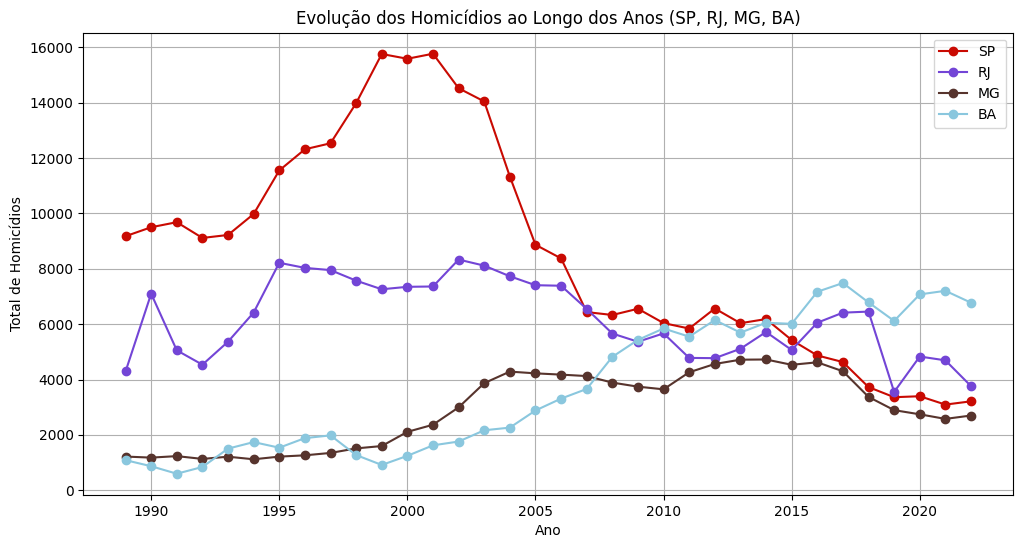

In [76]:
# Plota a tendência ao longo dos anos
plt.figure(figsize=(12, 6))

# Cores personalizadas em formato hexadecimal para os estados
cores = ['#c90a02', '#7345d6', '#57342d', '#8ac7de']

# Loop para cada estado e definir a cor correspondente
for i, estado in enumerate(estados_selecionados):
    plt.plot(homicidios_ano_estado.index, homicidios_ano_estado[estado], marker='o', label=estado, color=cores[i])

plt.title('Evolução dos Homicídios ao Longo dos Anos (SP, RJ, MG, BA)')
plt.xlabel('Ano')
plt.ylabel('Total de Homicídios')
plt.legend()
plt.grid(True)
plt.show()


**Pergunta 2 -** Quais são os estados com o maior número de homicídios no ano mais recente (último ano registrado)?

In [77]:
# Filtra os dados para o último ano
ano_recente = df['período'].max()
df_recente = df[(df['período'] == ano_recente) & (df['estado'].isin(estados_selecionados))]

In [78]:
# Agrupa por estado e somando os homicídios
homicidios_recente = df_recente.groupby('estado')['valor'].sum()

In [79]:
# Criando um DataFrame com os resultados
df_resultado = pd.DataFrame(homicidios_recente).reset_index()


INSIGHTS
Estado     Homicídios
 BA           6776
 MG           2699
 RJ           3762
 SP           3212


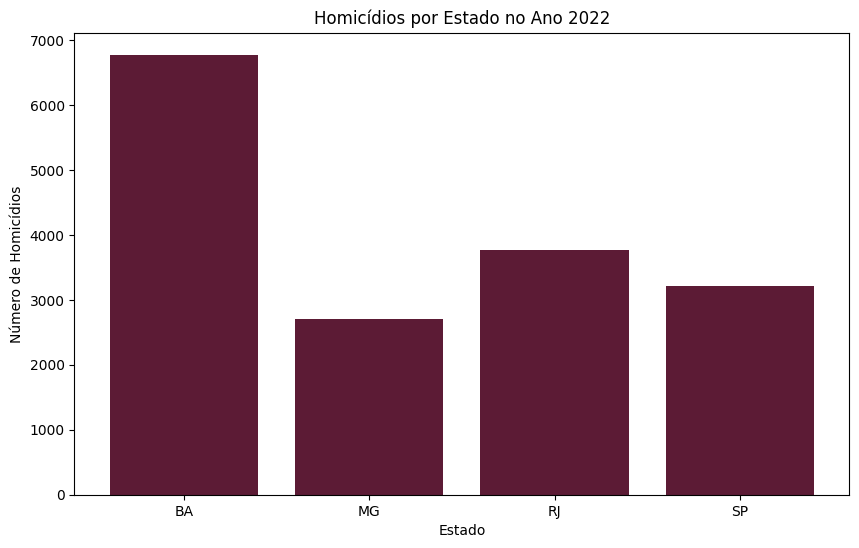

In [80]:
# Exibe os estados com maior número de homicídios no último ano
print("\nINSIGHTS")
print("{:10} {}".format("Estado", "Homicídios"))

# Exibe cada estado com o número de homicídios
for estado, homicidios in homicidios_recente.items():
    print("{:^5} {:12}".format(estado, homicidios))

# Plotando um gráfico de barras para visualização
plt.figure(figsize=(10, 6))
plt.bar(df_resultado['estado'], df_resultado['valor'], color='#5c1b35')
plt.title(f'Homicídios por Estado no Ano {ano_recente}')
plt.xlabel('Estado')
plt.ylabel('Número de Homicídios')
plt.show()



**Pergunta 3:** Qual é a média de homicídios por ano em SP, RJ, MG e BA?

In [81]:
# Agrupar por estado e calculando a média de homicídios por ano
media_homicidios_estado = df_filtrado.groupby('estado')['valor'].mean()

In [82]:
# Exibe a média de homicídios por estado
print("\nMédia de homicídios por ano:")
print("{:10} {}".format("Estado", "Média Homicídios"))

# Exibe cada estado com a média de homicídios
for estado, homicidios in media_homicidios_estado.items():
    print("{:^5} {:12.2f}".format(estado, homicidios))


Média de homicídios por ano:
Estado     Média Homicídios
 BA        3743.76
 MG        2924.79
 RJ        6175.15
 SP        8620.03


**Pergunta 4:** Quais estados apresentaram aumento ou redução no número de homicídios entre 2010 e 2020?

In [83]:
# Filtra dados para os anos 2010 e 2020
homicidios_2010 = df[(df['período'] == 2010) & (df['estado'].isin(estados_selecionados))]
homicidios_2020 = df[(df['período'] == 2020) & (df['estado'].isin(estados_selecionados))]

In [84]:
# Agrupa por estado e somando os homicídios
homicidios_2010 = homicidios_2010.groupby('estado')['valor'].sum()
homicidios_2020 = homicidios_2020.groupby('estado')['valor'].sum()

In [85]:
# Calcula a diferença entre os homicídios de 2020 e 2010
comparacao = pd.DataFrame({'2010': homicidios_2010, '2020': homicidios_2020})
comparacao['diferenca'] = comparacao['2020'] - comparacao['2010']

In [86]:
# Exibindo a diferença no número de homicídios entre 2010 e 2020
print("\nDiferença no número de homicídios entre 2010 e 2020:")
print("{:10} {:10}".format("Estado", "Diferença"))

# Exibindo a diferença para cada estado
for estado, valores in comparacao.iterrows():
    print("{:^5} {:11}".format(estado, valores['diferenca']))


Diferença no número de homicídios entre 2010 e 2020:
Estado     Diferença 
 BA          1232
 MG          -903
 RJ          -836
 SP         -2643


**Pergunta 5:** Qual é a variação no número de homicídios ao longo dos anos para os estados de SP, RJ, MG e BA?

In [87]:
# Calcula a variação entre o máximo e o mínimo número de homicídios
variacao_homicidios = df_filtrado.groupby('estado')['valor'].agg(['max', 'min'])

In [88]:
# Calcula a diferença entre o máximo e o mínimo
variacao_homicidios['variacao'] = variacao_homicidios['max'] - variacao_homicidios['min']

In [89]:
# Exibe a variação no número de homicídios ao longo dos anos
print("\nVariação no número de homicídios ao longo dos anos:")
print("{:10} {:10}".format("Estado", "Variação"))

# Exibe a variação para cada estado
for estado, valores in variacao_homicidios.iterrows():
    print("{:^5} {:11}".format(estado, valores['variacao']))



Variação no número de homicídios ao longo dos anos:
Estado     Variação  
 BA          6891
 MG          3606
 RJ          4783
 SP         12679


**Pergunta 6:** Quais estados apresentam a maior média de homicídios por mês ao longo dos anos?

In [90]:
# Extrai os meses e calcular a soma mensal
df['mes'] = df['período']  # Caso não tenha uma coluna de mês, considera o ano como base para as análises mensais

In [91]:
# Agrupa por estado e mês, somando os homicídios
homicidios_mensais = df[df['estado'].isin(estados_selecionados)].groupby(['estado', 'mes'])['valor'].sum().unstack()

In [92]:
# Calcula a média mensal por estado
media_mensal_estado = homicidios_mensais.mean(axis=1)

In [93]:
# Exibe a média mensal de homicídios por estado
print("\nMédia mensal de homicídios por estado:")
print("{:10} {:^10}".format("Estado", "Média Mensal"))

# Exibe a média mensal de homicídios para cada estado, ordenado do maior para o menor
for estado, media in media_mensal_estado.sort_values(ascending=False).items():
    print("{:^5} {:14}".format(estado, round(media, 2)))  # Arredonda a média para 2 casas decimais


Média mensal de homicídios por estado:
Estado     Média Mensal
 SP          8620.03
 RJ          6175.15
 BA          3743.76
 MG          2924.79
